In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('/content/drive/MyDrive/Reviews.csv')

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
data=data.dropna()
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
len(data)

568411

In [ ]:
#   0-> NEGATIVE REVIEW
#   1-> NEUTRAL REVIEW
#   2-> POSTIVE REVIEW
a=[]
for i in data['Score']:
    if i <3:                              
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)
len(a)

568411

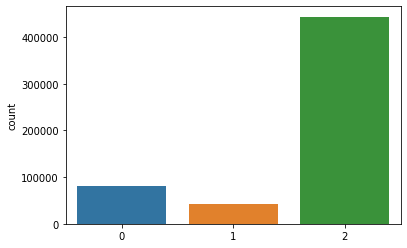

In [ ]:
import seaborn as sns
sns.countplot(a)

In [ ]:
data['sentiment']=a
final_dataset=data[['Text','sentiment']]
final_dataset.head()                

,Text,sentiment
0,I have bought several of the Vitality canned d...,2
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,2
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,2


In [ ]:
data_p=final_dataset[data['sentiment']==2]
data_n=final_dataset[data['sentiment']==0]
len(data_p),len(data_n)

(443766, 82007)

In [ ]:
import numpy as np
datap=data_p.iloc[np.random.randint(1,443766,25000),:]
len(datap)

25000

In [ ]:
datan=data_n.iloc[np.random.randint(1,82007,25000),:]
len(datan)

25000

In [ ]:
data=pd.concat([datap,datan])
len(data)

50000

In [ ]:
c=[]
for i in data['sentiment']:
    if i<2:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']=c  

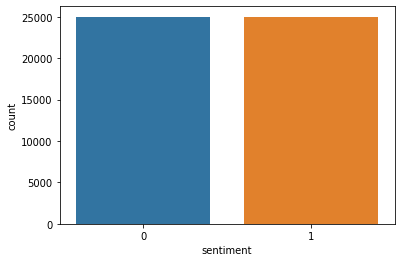

In [ ]:
import seaborn as sns
sns.countplot(data['sentiment'])

In [ ]:
#data.to_csv('Desktop/amazon test reviews.csv',index=False)

In [ ]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review']=data['Text'].apply(strip_html)
data.head()

,Text,sentiment,review
136173,"Crispy, chewy and intensely flavorful -- WOW, ...",1,"Crispy, chewy and intensely flavorful -- WOW, ..."
369526,The flavor of these is definitely what stands ...,1,The flavor of these is definitely what stands ...
533578,These are the same that you can buy at your lo...,1,These are the same that you can buy at your lo...
421703,"Coconut Oil is good for so many uses, this coc...",1,"Coconut Oil is good for so many uses, this coc..."
101036,This tea was surprisingly hard to find at the ...,1,This tea was surprisingly hard to find at the ...


In [ ]:
data=data.drop('Text',axis=1)
import nltk 
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review']=data['review'].apply(punc_clean)
data.head()

,sentiment,review
136173,1,Crispy chewy and intensely flavorful WOW they...
369526,1,The flavor of these is definitely what stands ...
533578,1,These are the same that you can buy at your lo...
421703,1,Coconut Oil is good for so many uses this coco...
101036,1,This tea was surprisingly hard to find at the ...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review']=data['review'].apply(remove_stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectr=CountVectorizer(ngram_range=(1,2),min_df=5)
vectr.fit(data['review'])
vect_X=vectr.transform(data['review'])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(vect_X,data['sentiment'])
clf.score(vect_X,data['sentiment'])

0.9983

In [ ]:
import tensorflow as tf

In [ ]:
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(50,activation='relu'))

ann.add(tf.keras.layers.Dense(50,activation='relu'))

ann.add(tf.keras.layers.Dense(1,activation='sigmoid'))

ann.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
b=list(data['sentiment'])

In [ ]:
np.array(b).reshape(-1,1).shape,vect_X.shape

((50000, 1), (50000, 84061))

In [ ]:
import numpy as np
ann.fit(vect_X,np.array(b).reshape(-1,1),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3413 - accuracy: 0.8618
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0520 - accuracy: 0.9822
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0125 - accuracy: 0.9967
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0013 - accuracy: 0.9996
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 9.2249e-04 - accuracy: 0.9998
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 10/10
1563/1563 [==============================] - 25s

In [ ]:
data_t=pd.read_csv('/content/drive/MyDrive/amazon test reviews.csv')
data_t.shape

(10000, 2)

In [ ]:
clf.score(vectr.transform(data_t['Text']),np.array(data_t['sentiment']).reshape(-1,1))

0.8819

In [ ]:
ann.evaluate(vectr.transform(data_t['Text']),np.array(data_t['sentiment']).reshape(-1,1))

313/313 [==============================] - 1s 1ms/step - loss: 1.0050 - accuracy: 0.8847


[1.0050325393676758, 0.8847000002861023]

In [ ]:
ann.predict(vectr.transform(['taste is not good']))

array([[0.00095683]], dtype=float32)

In [ ]:
ann.predict(vectr.transform(['taste is good']))

array([[0.99181116]], dtype=float32)

In [ ]:
clf.predict(vectr.transform(['i do like this food']))

array([1])

In [ ]:
clf.predict(vectr.transform(['i do not like this food']))

array([0])